In [1]:
%cd ..

/Users/ishamrashik/Desktop/machine-learning-and-ai-projects/community-mcp-session/aws_community_day/youtube-sentiment-insights


## 1. Importing Necessary Libraries


In [2]:
# Download dataset and copy to data/raw directory
import kagglehub
import os
import shutil
from pathlib import Path

# Dataset Preprocessing
import pandas as pd


## 1. Downloading the Dataset

In [3]:
# Create data/raw directory if it doesn't exist
raw_data_dir = Path("data/raw")
raw_data_dir.mkdir(parents=True, exist_ok=True)

try:
    # Download dataset to kagglehub cache
    cache_path = kagglehub.dataset_download("atifaliak/youtube-comments-dataset")
    print("✓ Dataset downloaded successfully!")
    print(f"Cache location: {cache_path}\n")
    
    # Copy files from cache to data/raw
    print(f"Copying files to {raw_data_dir}/...")
    print("="*60)
    
    copied_files = []
    csv_files = []
    for item in Path(cache_path).rglob('*'):
        if item.is_file():
            # Get relative path to preserve directory structure
            rel_path = item.relative_to(cache_path)
            dest_path = raw_data_dir / rel_path

            # Create parent directories if needed
            dest_path.parent.mkdir(parents=True, exist_ok=True)
            
            # Copy file
            shutil.copy2(item, dest_path)
            file_size = item.stat().st_size / (1024 * 1024)  # MB
            copied_files.append(str(dest_path))
            print(f"  ✓ {rel_path} ({file_size:.2f} MB)")

            # Collect csv files
            if dest_path.suffix.lower() == '.csv':
                csv_files.append(dest_path)
    
    print("="*60)
    print(f"✓ Successfully copied {len(copied_files)} file(s)")
    print(f"\nDataset saved to: {raw_data_dir.absolute()}")
    
    # Find the csv file path
    if len(csv_files) == 0:
        print("✗ No CSV file found in dataset.")
        csv_file_path = None
    elif len(csv_files) == 1:
        csv_file_path = str(csv_files[0])
        print(f"CSV file found: {csv_file_path}")
    else:
        print("Multiple CSV files found. Please select one:")
        for idx, fp in enumerate(csv_files):
            print(f"[{idx}]: {fp}")
        csv_file_path = str(csv_files[0])  # Default to first one
        print(f"Defaulting to: {csv_file_path}")

except Exception as e:
    print(f"✗ Error: {e}")
    print("\nAlternative: You can manually download from Kaggle:")
    print("1. Visit: https://www.kaggle.com/datasets")
    print("2. Search for 'youtube comments sentiment'")
    print("3. Download and place in data/raw/ directory")
    csv_file_path = None

✓ Dataset downloaded successfully!
Cache location: /Users/ishamrashik/.cache/kagglehub/datasets/atifaliak/youtube-comments-dataset/versions/1

Copying files to data/raw/...
  ✓ YoutubeCommentsDataSet.csv (3.33 MB)
✓ Successfully copied 1 file(s)

Dataset saved to: /Users/ishamrashik/Desktop/machine-learning-and-ai-projects/community-mcp-session/aws_community_day/youtube-sentiment-insights/data/raw
CSV file found: data/raw/YoutubeCommentsDataSet.csv


In [4]:
df = pd.read_csv(csv_file_path)
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [6]:
example_comment = df.sample()['Comment'].values
example_comment

array(['love the part where his teleprompter goes off and he looks briefly to his far left then starts reading off a paper on his desk instead'],
      dtype=object)

The dataset seemed to be already preprocessed. 

In [7]:
df.rename(columns={'Comment': 'clean_comment', 'Sentiment': 'category'}, inplace=True)

In [8]:
df.head()

,clean_comment,category
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [9]:
df.sample()['clean_comment'].values

array(['i seem to recall splatoon 2 being a dynamic 900p so it’s nice to see they were able to optimize the game enough to finally make it up to 1080p'],
      dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  18364 non-null  object
 1   category       18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


In [13]:
df.isnull().sum()

clean_comment    44
category          0
dtype: int64

In [14]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
positive    30
neutral     13
negative     1
Name: count, dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.duplicated().sum()

np.int64(490)

In [17]:
df[df.duplicated()]

,clean_comment,category
173,from all the stuff mentioned i have the dji mi...,positive
518,happy independence day to ukraine and glory t...,negative
847,linus just turn the key lights 180 and bounce ...,positive
848,dan continues to be my new favorite he has suc...,positive
849,dan managing to set up his soldering station o...,positive
...,...,...
18145,explore our free courses with completion certi...,neutral
18283,thanks for this video very neatly calmly expla...,positive
18298,explore our free courses with completion certi...,neutral
18308,do you want to learn technology from me check ...,neutral


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category


In [20]:
df[~(df['clean_comment'].str.strip() == '')]

,clean_comment,category
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
...,...,...
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18405,excelente video con una pregunta filosófica pr...,neutral
18406,hey daniel just discovered your channel a coup...,positive


In [21]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
20,linus just turn the key lights 180 and bounce ...,positive
30,unstoppable experiments with liquid nitrogen,positive
35,കേരളത്തിൽ ആദ്യമായി പെട്രോളിനെ എയ്സ് ആക്കിയ m4...,neutral
38,തന്നെ തളർത്താൻ നോക്കിയവർ പോലും അവന്റെ ഉയർച്ചയി...,neutral
39,എത്ര എടുത്താലും തീരാത്ത liquid nitrogen,neutral
...,...,...
18250,wow congratulations for starting such an amazi...,positive
18278,omg such awesome day to day life examples give...,positive
18343,amazing explanation i loved the way you taught,positive
18349,idk if you realise the intensity of positive i...,positive


In [22]:
# Remove trailing and leading whitespaces from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.strip()


In [23]:
# Verify the transformation by checking for any remaining trailing whitespaces
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [24]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()

,clean_comment,category


In [26]:
# Remove new line characters from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)

# Verify the transformation by checking for any remaining new lines
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining

,clean_comment,category


In [27]:
df

,clean_comment,category
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
...,...,...
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18405,excelente video con una pregunta filosófica pr...,neutral
18406,hey daniel just discovered your channel a coup...,positive


In [28]:
df['category'].value_counts()

category
positive    11054
neutral      4503
negative     2317
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='category', ylabel='count'>

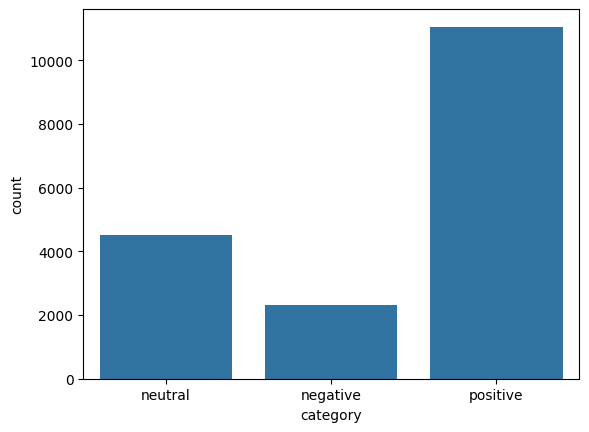

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes

sns.countplot(data=df,x="category")

In [30]:
# frequency distribution of sentiments

df['category'].value_counts(normalize=True).mul(100).round(2)

category
positive    61.84
neutral     25.19
negative    12.96
Name: proportion, dtype: float64

In [31]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [34]:
df.sample(5)

,clean_comment,category,word_count
2719,can we all just take a minute to appreciate ho...,positive,24
9399,as a tanzanian from the chagga tribe myself i ...,positive,28
12249,can you please do a video on how the math sect...,neutral,16
18158,hi op my question is regarding the challenge o...,negative,110
4161,it was hard enough for me to solve the normal ...,negative,18


In [35]:
df['word_count'].describe() 

count    17874.000000
mean        32.991664
std         45.526381
min          1.000000
25%         12.000000
50%         21.000000
75%         38.000000
max       1353.000000
Name: word_count, dtype: float64

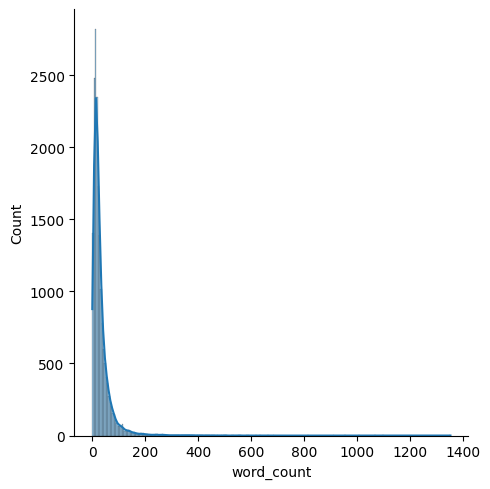

In [36]:
sns.displot(df['word_count'], kde=True)

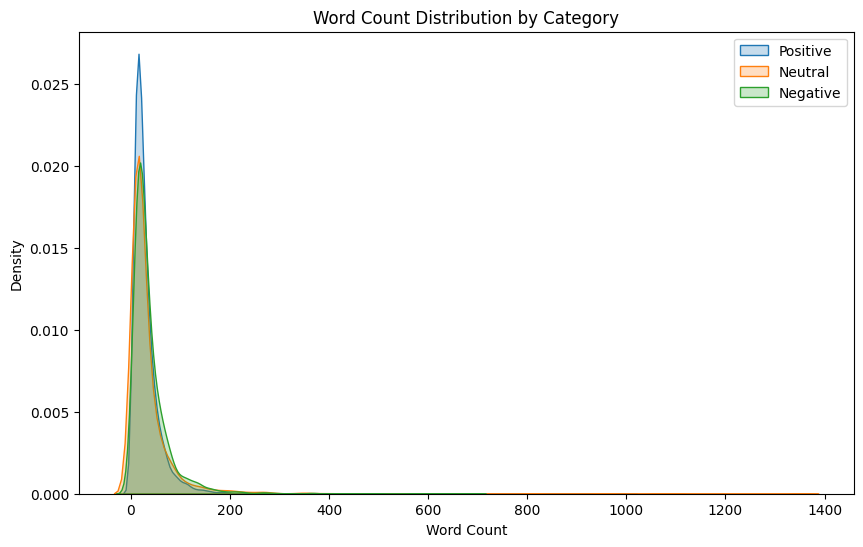

In [37]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 'positive']['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 'neutral']['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == 'negative']['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Spread Comparison Across Categories

Looking at the **dispersion** of each sentiment category:

### **Positive (Blue) - Most Concentrated**
- Has the **tallest, sharpest peak** (~0.027 density)
- This indicates the **least spread** - positive texts are most tightly clustered around very short word counts
- Interpretation: Positive sentiments tend to be expressed more briefly and consistently

### **Neutral (Orange) & Negative (Green) - Slightly Broader Spread**
- Both have **lower peaks** (~0.020 density)
- The lower peak with similar area under the curve means these distributions are **slightly more dispersed**
- They appear nearly identical to each other in terms of spread

### What This Means:

**Higher peak + narrower base = Lower spread (variance)**
- Positive content is more predictably short
- People expressing positive sentiment tend to be more uniform in length

**Lower peak + wider base = Higher spread (variance)**
- Neutral and negative content shows more variability in length
- Some neutral/negative texts may be slightly longer on average, or there's more variation

### Practical Implications:

1. **Positive feedback** tends to be quick and concise ("Great!", "Love it!", "Perfect!")
2. **Negative/Neutral content** may require more explanation or elaboration, leading to greater length variation
3. All categories still show that **most texts are very short**, but negative and neutral sentiments show slightly more willingness to elaborate

<Axes: ylabel='word_count'>

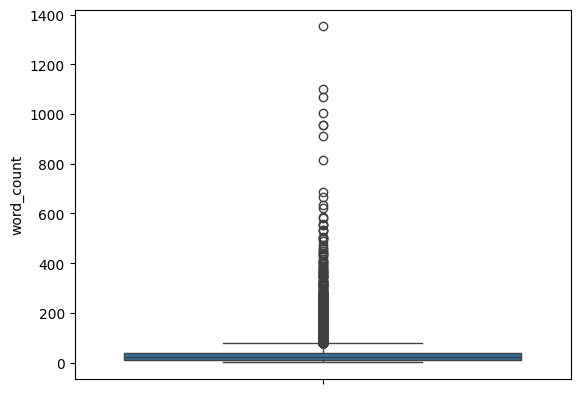

In [38]:
sns.boxplot(df['word_count'])

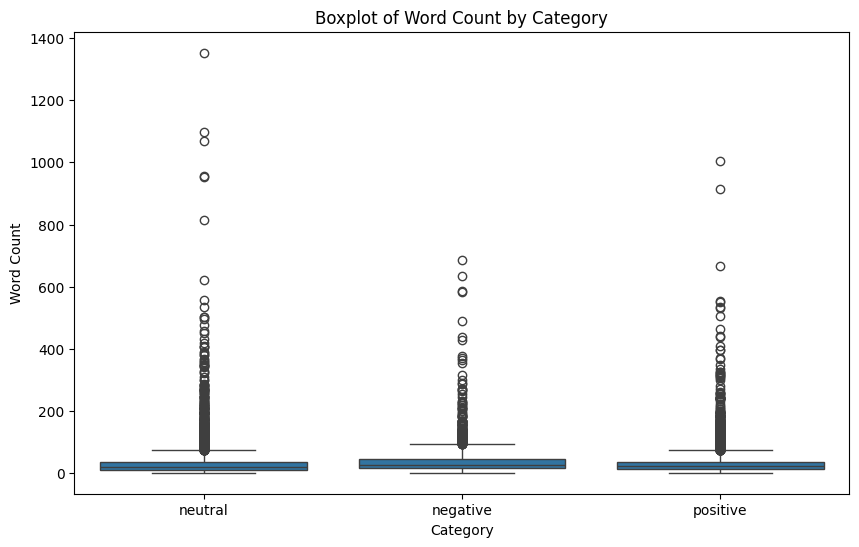

In [39]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

## Boxplot Analysis: Spread Across Categories

This boxplot provides a clearer view of the **statistical spread** than the density plot. Here's what it reveals:

### **The Box (Interquartile Range - Middle 50%)**

All three categories have **extremely compressed boxes** near zero, indicating:
- **Median** (center line): ~20-40 words for all categories
- **IQR** (box height): Very small, roughly 20-70 words
- The middle 50% of all texts are concentrated in a very narrow range

**Slight differences:**
- **Neutral** appears to have a marginally taller box (slightly more spread in the middle 50%)
- **Negative and Positive** have nearly identical box sizes

### **The Whiskers (Normal Range)**

The whiskers extend to approximately **100-150 words** for all categories, showing the "typical" maximum length before data becomes unusual.

### **Outliers (The Key Difference!)**

This is where the categories **truly differ**:

**Neutral (Left)**
- **Most extreme outliers** - extends to ~1,350 words
- **Most numerous outliers** in the upper ranges
- Suggests neutral content occasionally becomes very lengthy (explanations, descriptions, detailed reviews)

**Negative (Middle)**
- **Fewest extreme outliers** - maxes out around ~700 words
- More constrained upper range
- Negative rants exist but are relatively shorter

**Positive (Right)**  
- **Moderate outliers** - extends to ~1,000 words
- Middle ground between neutral and negative
- Some enthusiastic detailed praise, but less extreme than neutral

### **Key Insights on Spread:**

1. **Core data is nearly identical** - 75% of texts across all categories are under ~70 words

2. **The real spread difference is in the tail** - neutral content has the most variance due to occasional very long texts

3. **Negative content is most constrained** - even outliers rarely exceed 700 words (people complain briefly!)

4. **Positive has moderate variance** - between neutral and negative

This suggests that while most sentiment expression is brief, **neutral content allows for the most elaboration**, possibly because it includes informative or explanatory text rather than pure emotional expression.

<Axes: xlabel='category', ylabel='word_count'>

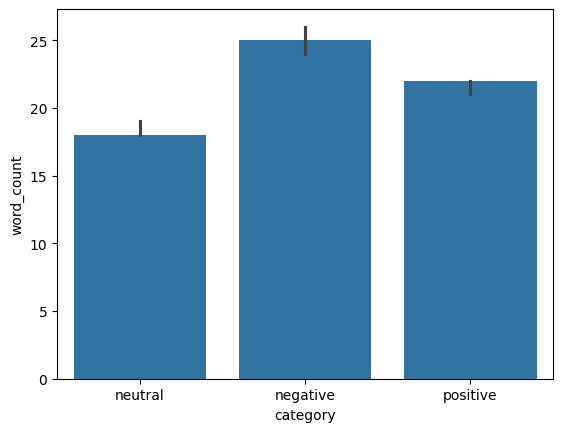

In [40]:
# median word counts among sentiments

sns.barplot(df,x='category',y='word_count',estimator='median')

In [41]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishamrashik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
df

,clean_comment,category,word_count,num_stop_words
0,lets not forget that apple pay in 2014 require...,neutral,57,23
1,here in nz 50 of retailers don’t even have con...,negative,29,10
2,i will forever acknowledge this channel with t...,positive,31,16
3,whenever i go to a place that doesn’t take app...,negative,83,34
4,apple pay is so convenient secure and easy to ...,positive,26,12
...,...,...,...,...
18403,i really like the point about engineering tool...,positive,52,21
18404,i’ve just started exploring this field and thi...,positive,23,11
18405,excelente video con una pregunta filosófica pr...,neutral,40,1
18406,hey daniel just discovered your channel a coup...,positive,16,5


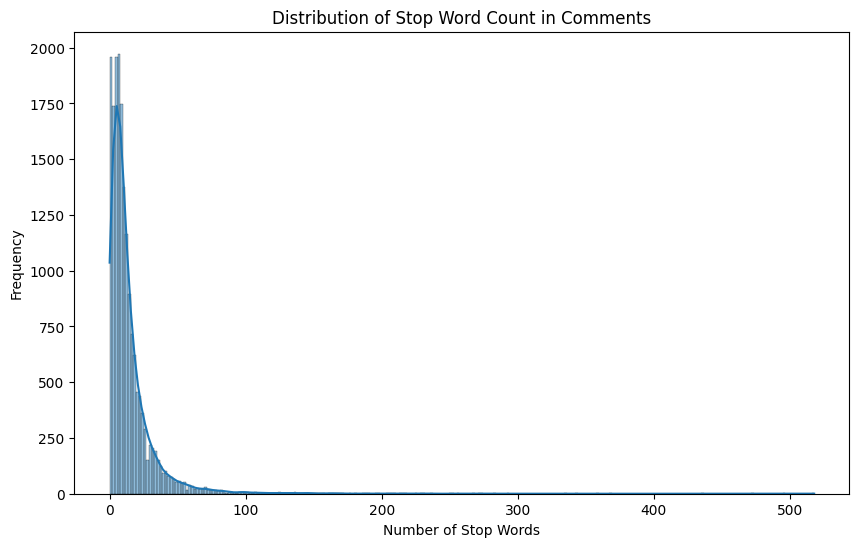

In [43]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()


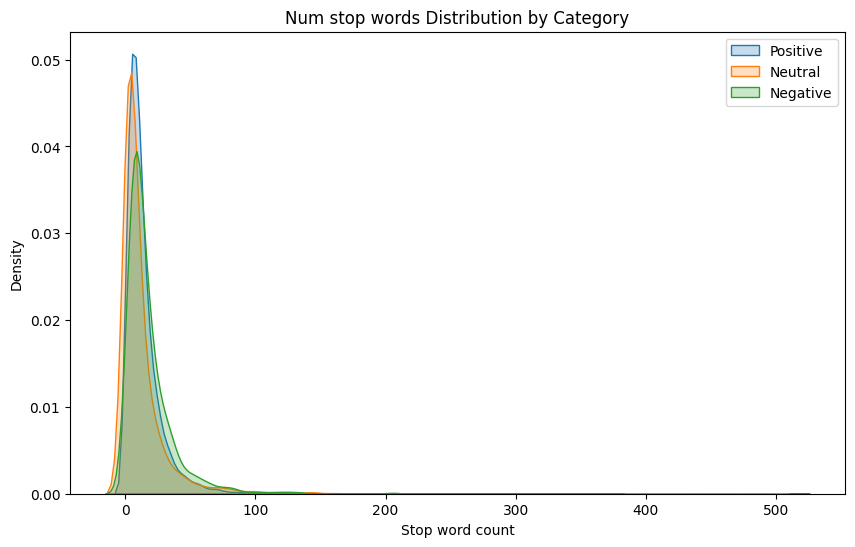

In [44]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 'positive']['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 'neutral']['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == 'negative']['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Stop Words Distribution Analysis

This graph shows the distribution of **stop words** (common function words like "the," "a," "is," "and," etc.) across sentiment categories.

### **Key Observations:**

**1. Peak Characteristics**

All three categories show **very similar patterns** with sharp peaks near zero:
- **Positive (Blue)**: Highest, sharpest peak (~0.051 density)
- **Neutral (Orange)**: Very close second (~0.049 density)  
- **Negative (Green)**: Slightly lower peak (~0.040 density)

**2. Spread Differences**

**Positive - Most Concentrated**
- **Tallest peak, narrowest base**
- Positive texts use the **fewest stop words** most consistently
- Suggests more direct, concise expression ("Great!" "Love it!")

**Neutral - Middle Ground**
- Peak nearly as high as positive
- Slightly more variance than positive
- Balanced use of stop words

**Negative - Broadest Spread**
- **Lowest peak = highest variance**
- **Wider distribution** suggests more variability in stop word usage
- Some negative texts are telegraphic ("Bad. Don't buy.") while others are more elaborate explanations

**3. Long Tail**

All categories extend to ~500 stop words, but the **negative category shows more density in the tail**, indicating occasional longer, more grammatically complete negative texts.

### **What This Reveals:**

**Stop Word Count as a Proxy for:**
- **Sentence completeness**: More stop words = more grammatically complete sentences
- **Elaboration level**: Higher stop words often correlate with explanatory text
- **Emotional expression style**: 
  - Positive: Direct, minimal structure needed
  - Negative: More varied - some terse, some detailed complaints

**Comparing with Word Count Graph:**

This pattern **reinforces** what we saw earlier:
- Positive content is most economical (fewest words, fewest stop words)
- Negative content shows the most variability in expression
- The similarity in overall shape suggests stop word usage scales with total word count

### **Practical Insight:**

Positive sentiment can be expressed with **minimal grammatical structure** (exclamations, sentence fragments), while negative sentiment often requires **more explanation and context** to justify the criticism, leading to more complete sentences and thus more stop words.

<Axes: xlabel='category', ylabel='num_stop_words'>

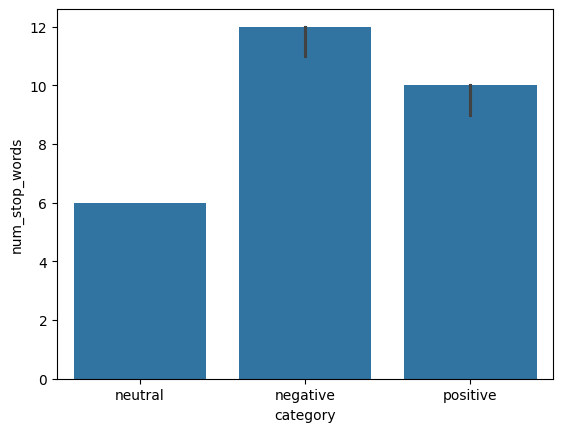

In [45]:
# median word counts among sentiments

sns.barplot(df,x='category',y='num_stop_words',estimator='median')

/var/folders/0_/y72yvm_x0pl62q2dh2nbv91c0000gn/T/ipykernel_46564/1548791571.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


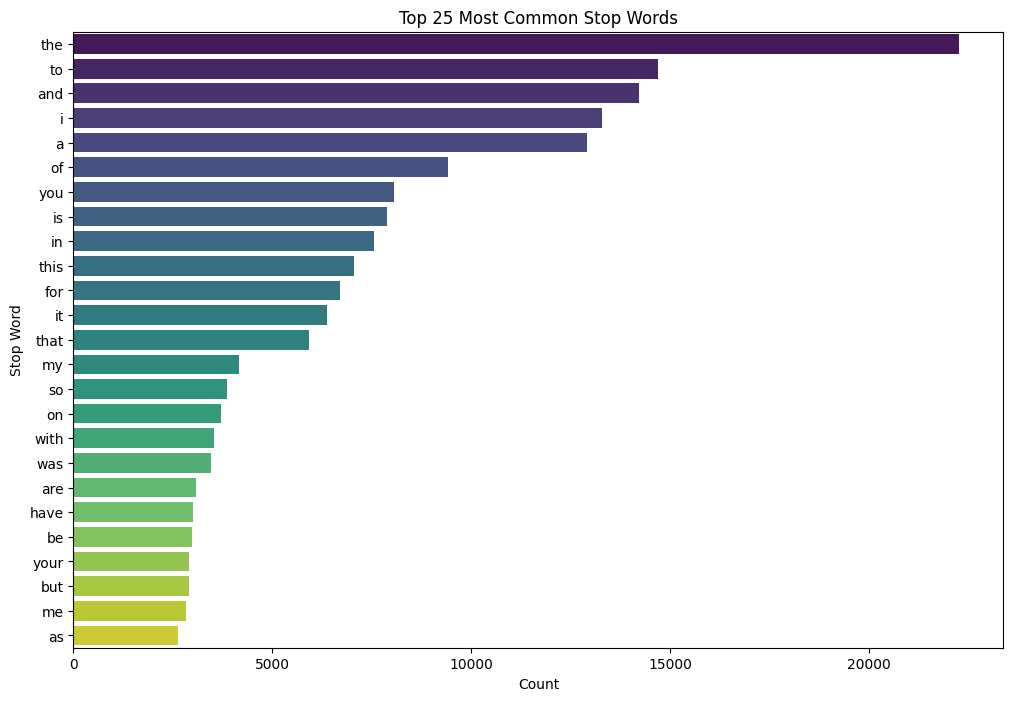

In [46]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()


In [47]:
df

,clean_comment,category,word_count,num_stop_words
0,lets not forget that apple pay in 2014 require...,neutral,57,23
1,here in nz 50 of retailers don’t even have con...,negative,29,10
2,i will forever acknowledge this channel with t...,positive,31,16
3,whenever i go to a place that doesn’t take app...,negative,83,34
4,apple pay is so convenient secure and easy to ...,positive,26,12
...,...,...,...,...
18403,i really like the point about engineering tool...,positive,52,21
18404,i’ve just started exploring this field and thi...,positive,23,11
18405,excelente video con una pregunta filosófica pr...,neutral,40,1
18406,hey daniel just discovered your channel a coup...,positive,16,5


In [48]:
df['num_chars'] = df['clean_comment'].apply(len)

df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,lets not forget that apple pay in 2014 require...,neutral,57,23,317
1,here in nz 50 of retailers don’t even have con...,negative,29,10,163
2,i will forever acknowledge this channel with t...,positive,31,16,183
3,whenever i go to a place that doesn’t take app...,negative,83,34,450
4,apple pay is so convenient secure and easy to ...,positive,26,12,135


In [49]:
df['num_chars'].describe()

count    17874.000000
mean       177.567976
std        252.165111
min          2.000000
25%         66.000000
50%        113.000000
75%        201.000000
max       7847.000000
Name: num_chars, dtype: float64

In [50]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)



In [51]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., 'ள', 'ፊ', 'ئ'], shape=(1900,), dtype=object)

In [52]:
char_frequency_df.tail(50)

,character,frequency
1264,文,1
1266,仝,1
1267,線,1
1303,壇,1
1305,陳,1
1367,𝓽,1
1343,ዋ,1
1346,ት,1
1347,ኪ,1
1348,ቹ,1


In [53]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
9857,привіт асмр лілібу відео чудове я вас дуже л...,positive,18,0,104,0
7045,husband and i went to the green knight movie o...,positive,37,23,177,0
1857,worked so well thanks or the tutorial,positive,7,3,37,0
8030,i love your videos they so funny and i love th...,positive,16,9,80,0
10858,im about to sleep good night everyone ♡,positive,8,2,39,0


In [54]:
df['num_punctuation_chars'].describe()

count    17874.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punctuation_chars, dtype: float64

/var/folders/0_/y72yvm_x0pl62q2dh2nbv91c0000gn/T/ipykernel_46564/1638384091.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


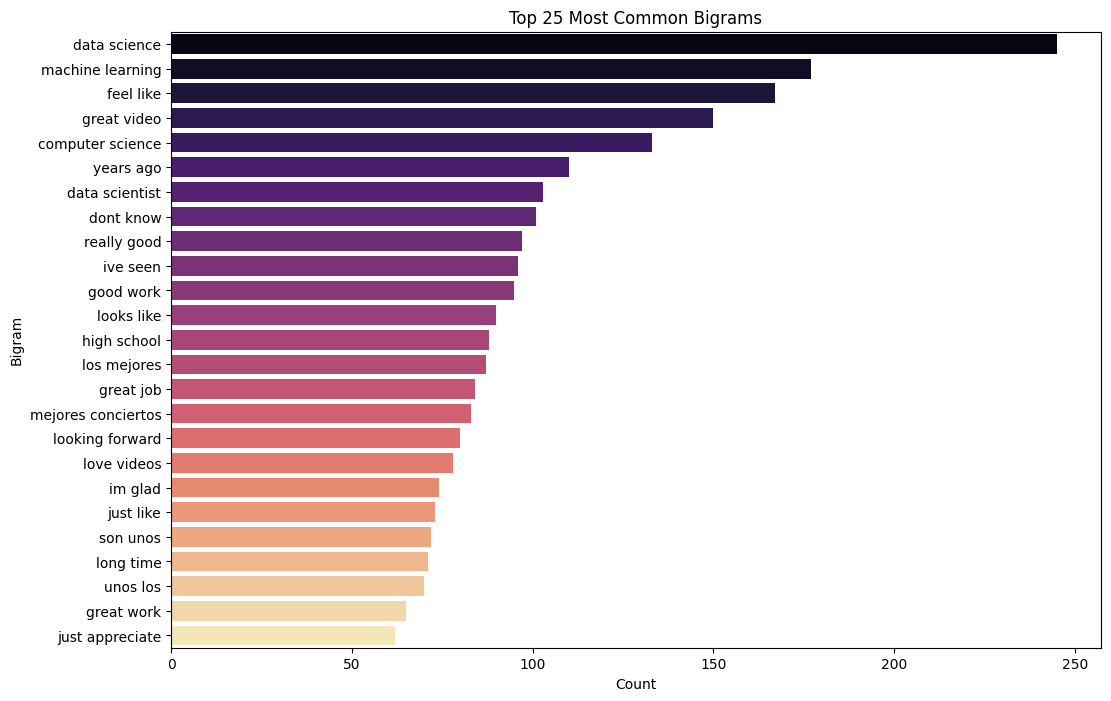

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()


/var/folders/0_/y72yvm_x0pl62q2dh2nbv91c0000gn/T/ipykernel_46564/2492861520.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


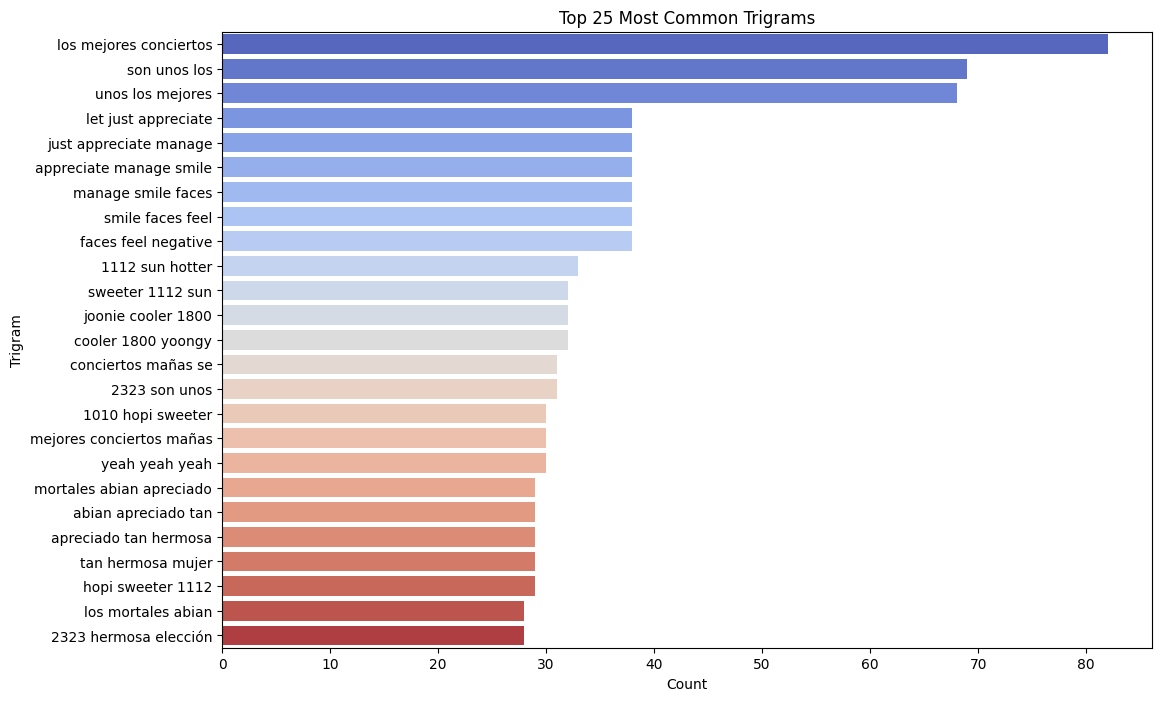

In [58]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [59]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

df.sample(5)


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
6184,facebook twitter instagram blogspot,neutral,5,0,55,0
6920,im happy that you said that our degrees should...,positive,41,20,224,0
5337,lannan sees the one he had to blur also him co...,neutral,14,6,75,0
2374,you are a very smart salesman and entrepreneur...,positive,11,5,64,0
11943,hi guys which minecraft youtuber do you like t...,neutral,10,5,53,0


In [60]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
4,,590996
1,e,301435
2,t,225325
11,a,207323
6,o,200811
14,i,192615
5,n,172531
3,s,168467
8,r,137793
10,h,120846


In [61]:
# Remove empty comments
df = df[~(df['clean_comment'].str.strip() == '')]

In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17681 entries, 0 to 18407
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   clean_comment          17681 non-null  object
 1   category               17681 non-null  object
 2   word_count             17681 non-null  int64 
 3   num_stop_words         17681 non-null  int64 
 4   num_chars              17681 non-null  int64 
 5   num_punctuation_chars  17681 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 966.9+ KB


In [63]:
df.isnull().sum()

clean_comment            0
category                 0
word_count               0
num_stop_words           0
num_chars                0
num_punctuation_chars    0
dtype: int64

In [64]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)


/var/folders/0_/y72yvm_x0pl62q2dh2nbv91c0000gn/T/ipykernel_46564/1127057549.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_comment'] = df['clean_comment'].apply(


In [65]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,lets not forget apple pay 2014 required brand ...,neutral,57,23,317,0
1,nz 50 retailers dont even contactless credit c...,negative,29,10,163,0
2,forever acknowledge channel help lessons ideas...,positive,31,16,183,0
3,whenever go place doesnt take apple pay doesnt...,negative,83,34,450,0
4,apple pay convenient secure easy use used kore...,positive,26,12,135,0


In [66]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ishamrashik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/0_/y72yvm_x0pl62q2dh2nbv91c0000gn/T/ipykernel_46564/1392873733.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_comment'] = df['clean_comment'].apply(


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,let not forget apple pay 2014 required brand n...,neutral,57,23,317,0
1,nz 50 retailer dont even contactless credit ca...,negative,29,10,163,0
2,forever acknowledge channel help lesson idea e...,positive,31,16,183,0
3,whenever go place doesnt take apple pay doesnt...,negative,83,34,450,0
4,apple pay convenient secure easy use used kore...,positive,26,12,135,0


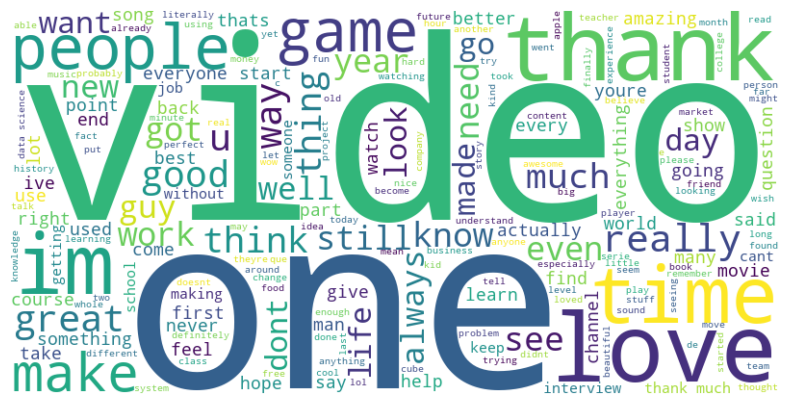

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df['clean_comment'])

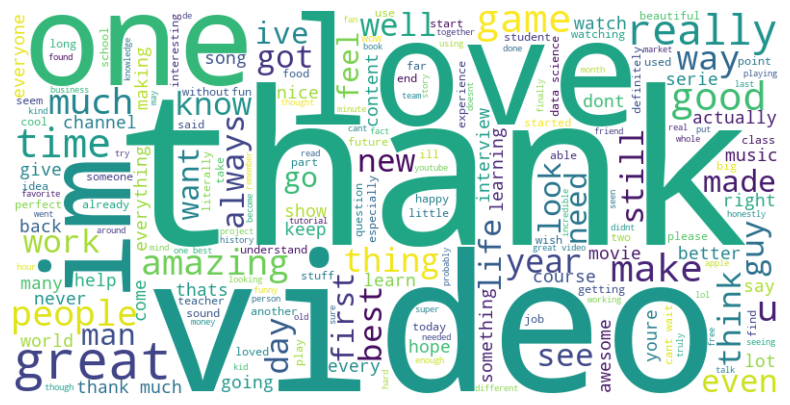

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == "positive"]['clean_comment'])

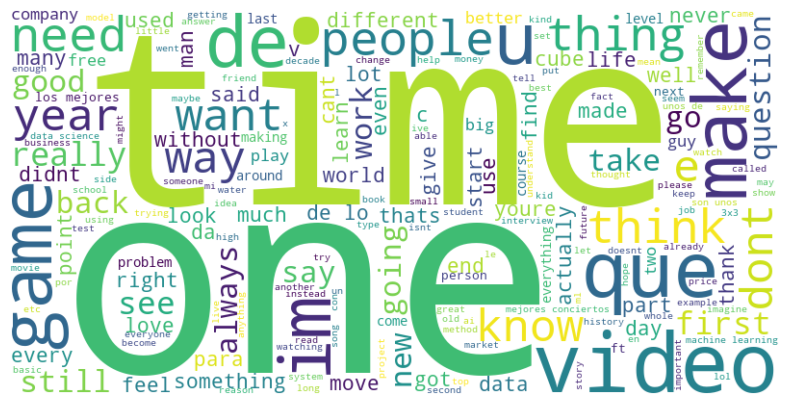

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == "neutral"]['clean_comment'])

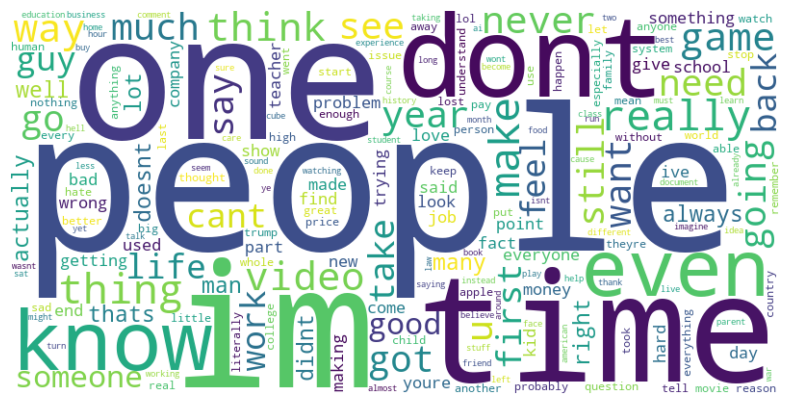

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == "negative"]['clean_comment'])

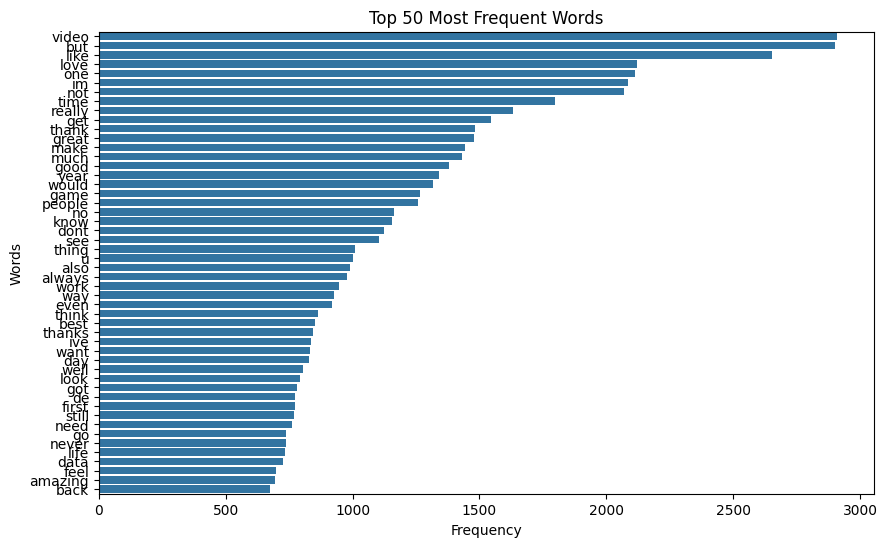

In [72]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)


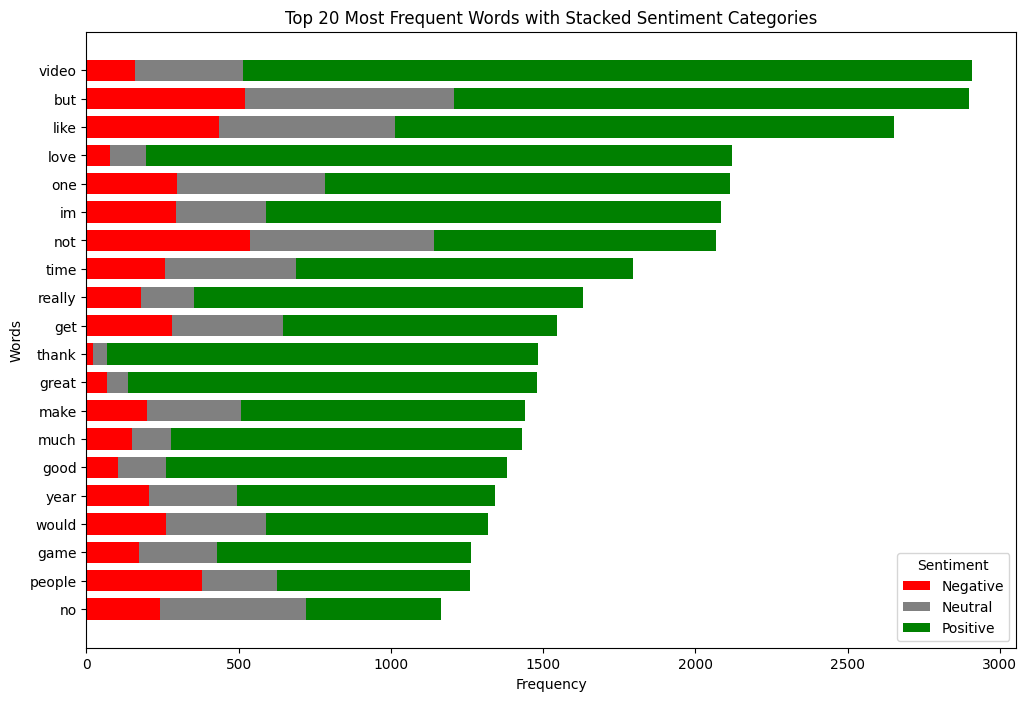

In [73]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """
    Plot the top N most frequent words in the dataset with stacked hue based on sentiment category.
    This version assumes that the 'category' column contains string labels (e.g., 'negative', 'neutral', 'positive') 
    and converts them internally to numeric indices for counting.
    """
    import matplotlib.pyplot as plt

    # Define mapping from category labels to numeric indices
    # Update this mapping if you have other category strings
    label_to_idx = {
        'negative': -1,
        'neutral': 0,
        'positive': 1
    }

    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category_label = row['category']
        # Map category label to int; skip row if label not recognized
        if category_label not in label_to_idx:
            continue
        category = label_to_idx[category_label]

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = {-1: 0, 0: 0, 1: 0}
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start + n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    plt.barh(word_labels, negative_counts, color='red', label='Negative', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i + j for i, j in zip(negative_counts, neutral_counts)], color='green', label='Positive', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()
    plt.show()


plot_top_n_words_by_category(df, n=20)
